In [126]:
import matplotlib.pyplot as plt
%matplotlib inline  
import analyse_tool 
import numpy as np
import simulation
from timeit import Timer
import revreaddy as rdy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


In [2]:
e=analyse_tool.Analyse(D=1,particles=3,length=1000,alpha=0.5,dt=1.0,version='lowen')
a=e.compute_trajectory()
    
plt.plot(a[0])
plt.show()

# Plot of 3 trajectories with different alpha

In [ ]:
fig = plt.figure()

colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
ax=plt.axes(projection='3d')
ax.set_axis_off()
ain=1
for i in (np.logspace(0.02,1.0,num=3,base=2)-1):
    e=analyse_tool.Analyse(D=1,particles=3,length=1000,alpha=i,dt=1.0,version='lowen')
    
#e=analyse_tool.Analyse(D=2,particles=3,length=2000,alpha=0.8,dt=0.1,version='lowencpp')
    a=e.compute_trajectory()
    plt.plot(a[0],a[1],a[2],color=colors[ain],alpha=1-e.alpha/2, label="$\\alpha $=$%.2f $" %(e.alpha))
    ain=ain+1
#plt.axis_off()
plt.legend()
#plt.savefig('Abschlussarbeit/data/trajectories_differentalpha.png',dpi=300)   # save the figure to file 


#plt.plot(range(len(a[0])),a[0])

# Alogithmic scaling

In [3]:
aneu=np.logspace(1,8.5,num=16,base=2)
time_n=[]
for i in aneu[1:]:
    print i
    timen=Timer(lambda: analyse_tool.Analyse(D=2,particles=1,length=int(i),alpha=0.5,dt=1,version='nhoch3').compute_trajectory())
    time_n.append(timen.timeit(number=1))

2.82842712475
4.0
5.65685424949
8.0
11.313708499
16.0
22.627416998
32.0
45.2548339959
64.0
90.5096679919
128.0
181.019335984
256.0
362.038671968


In [4]:
time_python1=[]
time_cpp1=[]
time_b1=[]
time_a1=[]
time_n1=[]
a1=np.logspace(1,10,num=10,base=2)
for i in a1:
    print i
    timec=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='cpp').compute_trajectory())
    timen=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=128,alpha=0.5,dt=1,version='nhoch3').compute_trajectory())
    timep=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1).compute_trajectory())
    timeb=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='lowen').compute_trajectory())
    timelowencpp=Timer(lambda: analyse_tool.Analyse(D=2,particles=int(i),length=1000,alpha=0.5,dt=1,version='lowencpp').compute_trajectory())  
    time_n1.append(timen.timeit(number=1)*3)
    time_python1.append(timep.timeit(number=1)*3)
    time_cpp1.append(timec.timeit(number=1))
    time_b1.append(timeb.timeit(number=1)*3)
    time_a1.append(timelowencpp.timeit(number=1))

2.0
4.0
8.0
16.0
32.0
64.0
128.0
256.0
512.0
1024.0


In [14]:
#ax1 = plt.subplot(221)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True ,figsize=(6,3))


textneu='\propto N'


ax1.plot(a1,time_python1,label="Our (p)")
ax1.plot(a1,time_cpp1,label="Our (c++)")
ax1.plot(a1,time_b1,label="lowen (p)")
ax1.plot(a1,time_a1,label="lowen (c++)")
ax1.plot(a1[:len(time_n1)],time_n1,label="Choleski (p)")
ax1.loglog(a1[1:],b[1:]/(1.0*10**3),"--", c="c",label= "$%s$  " %(textneu))

ax1.set_title('a) t  vs. Traj. amount (N)', fontsize=10)


ax1.set_ylim([min(a1[3:]*np.log(a1[3:])/(0.5*10**7)),max(time_b)])

ax1.set_xlabel('N', fontsize=10)
ax1.set_ylabel('t in sec', fontsize=10)
#ax1.legend(loc=4,fontsize='small')
ax1.set_xlim([0,max(a1)])

#plt.savefig('Abschlussarbeit/data/profiling_particle.png',dpi=300)   # save the figure to file 
#plt.show()
#ax1.setp(ax1.get_xticklabels(), fontsize=6)

# share y only
# = plt.subplot()
#ax2=plt.subplot(2, sharey=ax1)
text='\\propto M log(M)'

ax2.loglog(a,time_python,label="Our (p)")
ax2.loglog(a,time_cpp,label="Our (c++)")
ax2.loglog(a,time_b,label="lowen (p)")
ax2.loglog(a,time_a,label="lowen (c++)")
ax2.loglog(aneu[1:],time_n,label="Choleski (p)")
text1='\\propto M^3'
ax2.loglog(a[1:],a[1:]**3/(5*10**5),"--", label= "$%s$  " %(text1))
ax2.loglog(a[3:],a[3:]*np.log(a[3:])/(0.6*10**7) ,"--",c="g", label= "$%s$  " %(text))
ax2.loglog(10**10*a1[1:],10**10*b[1:]/(1.0*10**3),"--", c="c",label= "$%s$  " %(textneu))
plt.setp(ax2.get_xticklabels(), visible=False)


ax2.set_xlabel('M',fontsize=10)
ax2.set_xlim([0,max(a)])
ax2.set_title('b) t  vs. Traj. Length (M)', fontsize=10)


#ax2.ylabel('t in sec',fontsize=10)
lgd=ax2.legend(bbox_to_anchor=(1.05,1.03), loc='upper left', ncol=1, fontsize='small')
plt.savefig('Abschlussarbeit/data/nongaussiandouble.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)
  # save the figure to file 

# make these tick labels invisible
#plt.set_setp(ax2.get_yticklabels(), visible=False)



plt.show()

NameError: name 'a1' is not defined

# Accuarcy with alpha

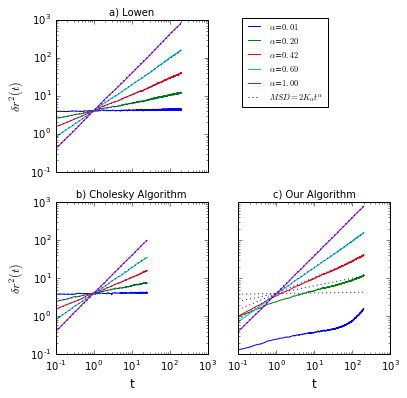

In [102]:
#f,  ((ax1, ax2), (ax3,)) = plt.subplots(2, 2, sharey=True ,figsize=(6,3))

plt.figure(figsize=(6,6))
ax3=plt.subplot(223)   #bottom left
ax2=plt.subplot(221,sharex=ax3)   #top left
ax1=plt.subplot(224,sharey=ax3)   #top right


msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
for i in (np.logspace(0.02,1.0,num=5,base=2)-1):
    e=analyse_tool.Analyse(D=2,particles=4000,length=2000,alpha=i,dt=0.1,version='cpp')
    msd,std=e.msd_ensemble()
    ax1.plot(e.t*e.dt, msd,label="$\\alpha $=$%.2f $" %(e.alpha))
    ax1.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])

ax1.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))
ax1.set_xlabel('t', fontsize=12)
plt.setp(ax1.get_yticklabels(), visible=False)

ax1.set_title('c) Our Algorithm', fontsize=10)

colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
for i in (np.logspace(0.02,1.0,num=5,base=2)-1):
    e=analyse_tool.Analyse(D=2,particles=4000,length=2000,alpha=i,dt=0.1,version='lowencpp')
    msd,std=e.msd_ensemble()
    ax2.plot(e.t*e.dt, msd,label="$\\alpha $=$%.2f $" %(e.alpha))
    ax2.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))
#ax2.set_xlabel('t', fontsize=12)
ax2.set_ylabel('$\delta r^{2}(t)$', fontsize=12)

ax2.set_title('a) Lowen', fontsize=10)


lgd=ax2.legend(bbox_to_anchor=(1.2,1.04), loc='upper left', ncol=1,fontsize='small')
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
for i in (np.logspace(0.02,1.0,num=5,base=2)-1):
    e=analyse_tool.Analyse(D=2,particles=4000,length=128*2,alpha=i,dt=0.1,version='nhoch3')
    msd,std=e.msd_ensemble()
    ax3.plot(e.t*e.dt, msd,label="$\\alpha $=$%.2f $" %(e.alpha))
    ax3.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])

ax3.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))
ax3.set_xlabel('t', fontsize=12)
ax3.set_ylabel('$\delta r^{2}(t)$', fontsize=12)
ax3.set_title('b) Cholesky Algorithm', fontsize=10)


#ax2.ylabel('t in sec',fontsize=10)
plt.savefig('Abschlussarbeit/data/alpha_changethree.png', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)

plt.show()

In [117]:
a=np.logspace(0.02,1.25,num=6,base=2)-1
a[4]=1
print a


[ 0.01395948  0.20246925  0.42602572  0.69114457  1.          1.37841423]



# Accuracy with Alpha different representation

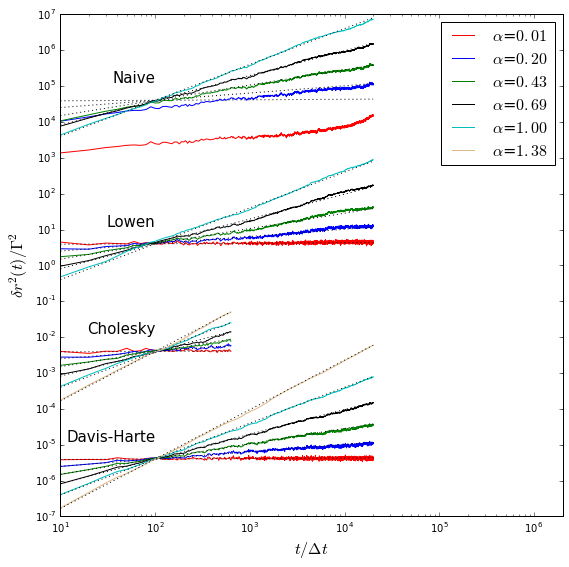

In [125]:
plt.figure(figsize=(9,9))
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
coloin=-1
a=np.logspace(0.02,1.25,num=6,base=2)-1
a[4]=1
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**5, 'Naive',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
for i in a[:-1]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='cpp')
    msd,std=e.msd_ensemble()
    plt.loglog(e.t/e.dt,10000*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,10000*e.msdanalyt(),":",color="k")

#ax1.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))

#ax1.set_title('c) Our Algorithm', fontsize=10)
coloin=-1
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10, 'Lowen',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for i in a[:-1]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='lowencpp')
    msd,std=e.msd_ensemble()
    plt.loglog(e.t/e.dt,1*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,1*e.msdanalyt(),":",color="k")
#ax2.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))

#ax2.set_title('a) Lowen', fontsize=10)


coloin=-1

colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**(-2), 'Cholesky',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for i in a[:]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=128*1/2,alpha=i,dt=0.1,version='nhoch3')
    msd,std=e.msd_ensemble()
    plt.plot(e.t/e.dt,0.001*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,0.001*e.msdanalyt(),":",color="k")
    
coloin=-1

colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**(-5), 'Davis-Harte',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
for i in a[:]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='hartecppverion2')
    msd,std=e.msd_ensemble()
    plt.plot(e.t/e.dt,0.000001*msd,color=colors[coloin],label="$\\alpha $=$%.2f $" %(e.alpha))
    plt.loglog(e.t/e.dt,0.000001*e.msdanalyt(),":",color="k")

plt.xlim((0,2000000))
#plt.loglog(e.t/e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))

plt.legend( ncol=1,fontsize=16)

plt.xlabel('$t/ \Delta t$', fontsize=16)
plt.ylabel('$\delta r^{2}(t)/ \Gamma^2$', fontsize=16)


#ax3.set_title('b) Cholesky Algorithm', fontsize=10)
#ax2plt.xlim((0,200000))
plt.savefig('Abschlussarbeit/data/alpha_changethreeneu.png', bbox_inches='tight',dpi=300)
plt.show()

In [3]:
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
for i in (np.logspace(0.02,1.4,num=5,base=2)-1):
    e=analyse_tool.Analyse(D=2,particles=4000,length=2000,alpha=i,dt=0.1,version='hartecppverion2')
    msd,std=e.msd_ensemble()
    plt.plot(e.t*e.dt, msd,label="$\\alpha $=$%.2f $" %(e.alpha))
    plt.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1])
plt.legend()
plt.show()

In [ ]:
def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(map(lambda x: round(x)-1, result), dtype=np.uint64)

y = gen_log_space(2000, 50)
y1 = gen_log_space(300, 20)

print y1
def gamma(D,dt):
     return 2*D*dt

# Backward Forward Msd

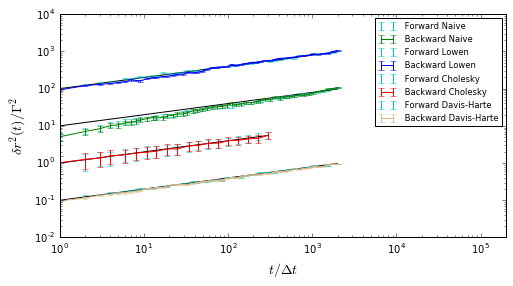

In [80]:
msd_text='2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.figure(figsize=(8,4))
e=analyse_tool.Analyse(D=20,particles=1000,length=2000,alpha=0.3,dt=1,version='cpp')

msd,std=e.msd_ensemble()

plt.loglog(e.t,10*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y], 10*msd[y]/gamma(e.D,e.dt),yerr=10*std[y]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Naive" )
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t[y], 10*msd1[y]/gamma(e.D,e.dt),yerr=10*std1[y]/gamma(e.D,e.dt), color="g",label= " Backward Naive" )

e=analyse_tool.Analyse(D=200,particles=1000,length=2000,alpha=0.3,dt=1,version='lowencpp')

msd,std3=e.msd_ensemble()

plt.loglog(e.t,100*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y], 100*msd[y]/gamma(e.D,e.dt),yerr=100*std3[y]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Lowen" )
e.invert_time()
msd1,std4=e.msd_ensemble()
plt.errorbar(e.t[y], 100*msd1[y]/gamma(e.D,e.dt),yerr=100*std4[y]/gamma(e.D,e.dt), color="b",label= " Backward Lowen" )







e=analyse_tool.Analyse(D=2,particles=1000,length=300,alpha=0.3,dt=1,version='nhoch3')
msd,std=e.msd_ensemble()

plt.loglog(e.t,1.0*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y1], 1*msd[y1]/gamma(e.D,e.dt),yerr=1*std[y1]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Cholesky" )
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t[y1], 1*msd1[y1]/gamma(e.D,e.dt),yerr=1*std1[y1]/gamma(e.D,e.dt), color="r",label= " Backward Cholesky" )


e=analyse_tool.Analyse(D=200,particles=1000,length=2000,alpha=0.3,dt=1.0,version='hartecppverion2')
msd,std=e.msd_ensemble()
plt.loglog(e.t/e.dt,0.1*e.msdanalyt()/gamma(e.D,e.dt),color="k")
plt.errorbar(e.t[y]/e.dt, 0.1*msd[y]/gamma(e.D,e.dt),yerr=0.1*std3[y]/gamma(e.D,e.dt), color="c",linestyle="",label= " Forward Davis-Harte" )
e.invert_time()
msd1,std1=e.msd_ensemble()
plt.errorbar(e.t[y], 0.1*msd1[y]/gamma(e.D,e.dt),yerr=0.1*std4[y]/gamma(e.D,e.dt), color="burlywood",label= " Backward Davis-Harte" )





plt.xlim((0,200000))

plt.xlabel('$t/ \Delta t$', fontsize=14)
plt.ylabel('$\delta r^{2}(t)/ \Gamma^2$', fontsize=14)
lgd=plt.legend(  ncol=1,fontsize='small')
plt.savefig('Abschlussarbeit/data/changeintimenew.png', bbox_inches='tight',dpi=300)   # save the figure to file 

plt.show()

# Rescaled FUnction

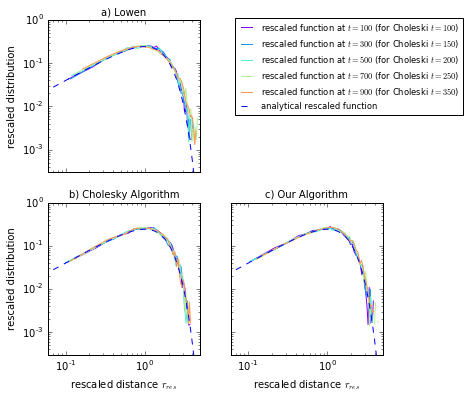

In [83]:
plt.figure(figsize=(6,6))
ax3=plt.subplot(223)   #bottom left
ax2=plt.subplot(221,sharex=ax3)   #top left
ax1=plt.subplot(224,sharey=ax3)   #bottom right

colornum=-1
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
analt=c.rescaled_analytical_distribution(1,5)
c=analyse_tool.Analyse(D=2,particles=10000,length=length+1,alpha=0.5,dt=1,version="cpp")
for j in range(100,1100,1000/steps):
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        ax1.loglog(h[0],h[1],color=next(colors), label="rescaled function at $t=%d$" %(j))
        #plt.plot(d[0],d[1],color='%f' %(shade))
ax1.plot(analt[0],analt[1],"--", label="analytical rescaled function")
ax1.set_xlabel('rescaled distance $ r_{res} $ ', fontsize=10)
#ax1.set_ylabel('rescaled distribution', fontsize=10)
#plt.legend(loc=3, fontsize='small')
ax1.set_xlim([0.06,5])
ax1.set_ylim([0.0003,1])
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.set_title('c) Our Algorithm', fontsize=10)

colornum=-1
index=0
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
choleskirange=[100,150,200,250,350]
c=analyse_tool.Analyse(D=2,particles=10000,length=length+1,alpha=0.5,dt=1,version="lowen")
for j in range(100,1100,1000/steps):   
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        ax2.loglog(h[0],h[1],color=next(colors), label="rescaled function at $t=%d$ (for Choleski $t=%d$)" %(j,choleskirange[index]))
        #plt.plot(d[0],d[1],color='%f' %(shade))
        index=index+1
ax2.plot(analt[0],analt[1],"--", label="analytical rescaled function")
#ax2.set_xlabel('rescaled distance $ r_{res} $ ', fontsize=10)
ax2.set_ylabel('rescaled distribution', fontsize=10)
#plt.legend(loc=3, fontsize='small')
ax2.set_xlim([0.06,5])
ax2.set_ylim([0.0003,1])
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.set_title('a) Lowen', fontsize=10)
lgd=ax2.legend(bbox_to_anchor=(1.2,1.04), loc='upper left', ncol=1,fontsize='small')

colornum=-1
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
c=analyse_tool.Analyse(D=2,particles=10000,length=351,alpha=0.5,dt=1,version="nhoch3")
for j in [100,150,200,250,350]:
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        ax3.loglog(h[0],h[1],color=next(colors), label="rescaled function at $t=%d$" %(j))
        #plt.plot(d[0],d[1],color='%f' %(shade))
ax3.plot(analt[0],analt[1],"--", label="analytical rescaled function")
ax3.set_xlabel('rescaled distance $ r_{res} $ ', fontsize=10)
ax3.set_ylabel('rescaled distribution', fontsize=10)
#plt.legend(loc=3, fontsize='small')
ax3.set_xlim([0.06,5])
ax3.set_ylim([0.0003,1])
ax3.set_title('b) Cholesky Algorithm', fontsize=10)


#ax2.ylabel('t in sec',fontsize=10)
plt.savefig('Abschlussarbeit/data/scaledfunctionneu12.png', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)
plt.show()

# This is a new represesentation of the rescaled function

In [ ]:
'''
plt.figure(figsize=(9,9))
msd_text='MSD=2 K_\\alpha t^\\alpha'
t='t=\\Delta t \\cdot n'
coloin=-1
a=np.logspace(0.02,1.25,num=6,base=2)-1
a[4]=1
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**5, 'Naive',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
for i in a[:-1]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='cpp')
    msd,std=e.msd_ensemble()
    plt.loglog(e.t/e.dt,10000*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,10000*e.msdanalyt(),":",color="k")

#ax1.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))

#ax1.set_title('c) Our Algorithm', fontsize=10)
coloin=-1
colors=['r','b','g','k','c','w','b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10, 'Lowen',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for i in a[:-1]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='lowencpp')
    msd,std=e.msd_ensemble()
    plt.loglog(e.t/e.dt,1*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,1*e.msdanalyt(),":",color="k")
#ax2.loglog(e.t*e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))

#ax2.set_title('a) Lowen', fontsize=10)


coloin=-1

colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**(-2), 'Cholesky',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for i in a[:]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=128*1/2,alpha=i,dt=0.1,version='nhoch3')
    msd,std=e.msd_ensemble()
    plt.plot(e.t/e.dt,0.001*msd,color=colors[coloin])
    plt.loglog(e.t/e.dt,0.001*e.msdanalyt(),":",color="k")
    
coloin=-1

colors=['r','b','g','k','c',"burlywood",'b','r','g','b','k','c','w','b','r','g','b','k','c','w','bo','ro','go','bo','ko','co','wo','bo']
plt.text(100, 10**(-5), 'Davis-Harte',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
for i in a[:]:
    coloin=coloin+1
    e=analyse_tool.Analyse(D=2,particles=400,length=2000,alpha=i,dt=0.1,version='hartecppverion2')
    msd,std=e.msd_ensemble()
    plt.plot(e.t/e.dt,0.000001*msd,color=colors[coloin],label="$\\alpha $=$%.2f $" %(e.alpha))
    plt.loglog(e.t/e.dt,0.000001*e.msdanalyt(),":",color="k")

plt.xlim((0,2000000))
#plt.loglog(e.t/e.dt,e.msdanalyt(),":",color=colors[1], label="$%s$ " %(msd_text))

plt.legend( ncol=1,fontsize=16)

plt.xlabel('$t/ \Delta t$', fontsize=16)
plt.ylabel('$\delta r^{2}(t)/ \Gamma^2$', fontsize=16)

'''
plt.figure(figsize=(9,9))

colornum=-1
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
analt=c.rescaled_analytical_distribution(1,5)
plt.text(0.5, 1, 'Naive',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

c=analyse_tool.Analyse(D=0.2,particles=10000,length=length+1,alpha=0.5,dt=1,version="cpp")
for j in range(100,1100,1000/steps):
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],h[1],color=next(colors))
        #plt.plot(d[0],d[1],color='%f' %(shade))
plt.plot(analt[0],analt[1],"--")
plt.xlabel('$r_{res} \Gamma$ ', fontsize=14)

#ax1.set_xlim([0.06,5])
#ax1.set_ylim([0.0003,1])
#plt.setp(ax1.get_yticklabels(), visible=False)
#ax1.set_title('c) Our Algorithm', fontsize=14)

colornum=-1
index=0
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
choleskirange=[100,150,200,250,350]
c=analyse_tool.Analyse(D=2,particles=10000,length=length+1,alpha=0.5,dt=1,version="lowen")
plt.text(0.5, 1000, 'Lowen',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

for j in range(100,1100,1000/steps):   
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],1000*h[1],color=next(colors))
        #plt.plot(d[0],d[1],color='%f' %(shade))
        index=index+1
plt.plot(analt[0],1000*analt[1],"--")
#ax2.set_xlabel('rescaled distance $ r_{res} $ ', fontsize=10)
plt.ylabel('$ \mathcal{P}_{gauss}(\hat{r}) $', fontsize=16)
plt.xlabel(' $ \hat{r} $ ', fontsize=16)

#plt.legend(loc=3, fontsize='small')
#ax2.set_xlim([0.06,5])
#ax2.set_ylim([0.0003,1])
#plt.setp(ax2.get_xticklabels(), visible=False)
#ax2.set_title('a) Lowen', fontsize=10)
#lgd=ax2.legend(bbox_to_anchor=(1.2,1.04), loc='upper left', ncol=1,fontsize='small')

colornum=-1
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
plt.text(0.5, 0.0001, 'Cholesky',verticalalignment='bottom', horizontalalignment='right', fontsize=15)
c=analyse_tool.Analyse(D=2,particles=10000,length=351,alpha=0.5,dt=1,version="nhoch3")
for j in [100,150,200,250,350]:
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],0.0001*h[1],color=next(colors))
        #plt.plot(d[0],d[1],color='%f' %(shade))
plt.loglog(analt[0],0.0001*analt[1],"--")

colornum=-1
index=0
length=1100
steps=5
shades=np.linspace(0,1,steps+1)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))
choleskirange=[100,150,200,250,350]
plt.text(0.5, 0.0000001, 'Davis-Harte',verticalalignment='bottom', horizontalalignment='right', fontsize=15)

c=analyse_tool.Analyse(D=2,particles=10000,length=length+1,alpha=0.5,dt=1,version="hartecppverion2")
for j in range(100,1100,1000/steps):   
        colornum=1+colornum
        shade=shades[colornum]
        #d=c.rescaled_analytical_distribution(t=j,r_dis=50)
        h=c.rescaled_function(t=j,histpoints=35)
        plt.loglog(h[0],0.0000001*h[1],color=next(colors), label="$ \mathcal{P}_{gauss}(\hat{r}) $, $t=%d$ (Choleski: $t=%d$)" %(j,choleskirange[index]))
        #plt.plot(d[0],d[1],color='%f' %(shade))
        index=index+1
plt.plot(analt[0],0.0000001*analt[1],"--")
#ax2.set_xlabel('rescaled distance $ r_{res} $ ', fontsize=10)
#ax3.set_ylabel('rescaled distribution', fontsize=10)
plt.legend( fontsize=12)

plt.xlim([0,80])
plt.ylim([10**(-13),10000])

#ax3.set_ylim([0.0003,1])
#ax3.set_title('b) Cholesky Algorithm', fontsize=10)


#ax2.ylabel('t in sec',fontsize=10)
plt.savefig('Abschlussarbeit/data/scaledfunctionneu12.png',bbox_inches='tight',dpi=300)
plt.show()

# Non-gaussian parameter

In [ ]:

length=1000
steps=50


gaussianparamter3=[]
for i in range(steps):
        print 3,i
        c=analyse_tool.Analyse(D=2,particles=5000,length=356,alpha=0.5,dt=0.1,version="nhoch3")
        b=c.nongaussian_parameter()
        gaussianparamter3.append(b)
gaussianparamter3=np.array(gaussianparamter3)





In [4]:
length=2**7
steps =1
print 2**8


gaussianparamter2=[]
for i in range(steps):
        print 3,i
        c=analyse_tool.Analyse(D=2,particles=10000,length=length,alpha=1.1,dt=0.1,version="hartecpp")
        c.invert_time()
        b=c.nongaussian_parameter()
        gaussianparamter2.append(b)
gaussianparamter2=np.array(gaussianparamter2)

steps=1


gaussianparamter3=[]
for i in range(steps):
        print 3,i
        c=analyse_tool.Analyse(D=2,particles=10000,length=length,alpha=1.1,dt=0.1,version="hartecppverion2")
        #c.invert_time()
        b=c.nongaussian_parameter()
        gaussianparamter3.append(b)
gaussianparamter3=np.array(gaussianparamter3)

256
3 0
3 0


analyse_tool.py:133: RuntimeWarning: invalid value encountered in divide
  nongaussianparamter=(1/3.)*moment4/moment2poten2-1


In [5]:
plt.errorbar(range(length), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="$\\alpha $=$%.2f $" %(c.alpha))
plt.errorbar(range(length), gaussianparamter3.mean(axis=0), yerr=gaussianparamter3.std(axis=0),errorevery=10,label="$\\alpha $=$%.2f $" %(c.alpha))

    #plt.errorbar(range(length+1), gaussianparamter1.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=10,label="Our")

plt.xlabel('t', fontsize=10)
plt.ylabel('$\\alpha_2(t)$ non-Gaussian parameter', fontsize=10)
plt.legend(loc=2,fontsize='small')
#plt.savefig('Abschlussarbeit/data/nongaussianlowenalpha.png',dpi=300)
plt.show()
    

In [3]:

length=1000
steps=40


plt.figure(figsize=(6.5,4))

for alpha in [1.0,0.7,0.3,0.1]:
    gaussianparamter2=[]
    msd_all=[]
    for i in range(steps):
            print 2,i
            c=analyse_tool.Analyse(D=2,particles=5000,length=length+1,alpha=alpha,dt=1.0,version="lowen")
            b=c.nongaussian_parameter()
            gaussianparamter2.append(b)
            msd,std=c.msd_ensemble()
            msd_all.append(msd)
    msd_all=np.array(msd_all)        
    gaussianparamter2=np.array(gaussianparamter2)
    #plt.errorbar(range(356), gaussianparamter3.mean(axis=0), yerr=gaussianparamter3.std(axis=0),errorevery=10,label="Choleski")
    plt.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="$\\alpha $=$%.2f $" %(c.alpha))
    #plt.errorbar(range(length+1), gaussianparamter1.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=10,label="Our")

plt.xlabel('t', fontsize=10)
plt.ylabel('$\\alpha_2(t)$ non-Gaussian parameter', fontsize=10)
plt.legend(loc=2,fontsize='small')
plt.savefig('Abschlussarbeit/data/nongaussianlowenalpha.png',dpi=300)
plt.show()
    

2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39


/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True ,figsize=(6,3))

length=1000
steps=50

for alpha in [1.0,0.7,0.3,0.1]:
    gaussianparamter2=[]
    msd_all=[]
    for i in range(steps):
            print 2,i
            c=analyse_tool.Analyse(D=2,particles=5000,length=length+1,alpha=alpha,dt=1.0,version="lowen")
            b=c.nongaussian_parameter()
            gaussianparamter2.append(b)
            msd,std=c.msd_ensemble()
            msd_all.append(msd)
    msd_all=np.array(msd_all)        
    gaussianparamter2=np.array(gaussianparamter2)
    plt.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="$\\alpha $=$%.2f $" %(c.alpha))

ax2.set_xlabel('t', fontsize=10)
#ax2.set_ylabel('$\\alpha_2(t)$ non-Gaussian parameter', fontsize=10)
ax2.legend(loc=2,fontsize='small')
ax2.set_title('a) $\\alpha_2(t)$  vs. $\\alpha$', fontsize=10)
plt.setp(ax2.get_yticklabels(), visible=False)



gaussianparamter1=[]
for i in range(steps):
        print 1,i
        c=analyse_tool.Analyse(D=2,particles=5000,length=length+1,alpha=0.5,dt=0.1,version="python")
        b=c.nongaussian_parameter()
        gaussianparamter1.append(b)
gaussianparamter1=np.array(gaussianparamter1)





gaussianparamter2=[]
for i in range(steps):
        print 3,i
        c=analyse_tool.Analyse(D=2,particles=5000,length=length+1,alpha=0.5,dt=0.1,version="lowen")
        b=c.nongaussian_parameter()
        gaussianparamter2.append(b)
gaussianparamter2=np.array(gaussianparamter2)




gaussianparamter3=[]
for i in range(steps):
        print 3,i
        c=analyse_tool.Analyse(D=2,particles=5000,length=356,alpha=0.5,dt=0.1,version="nhoch3")
        b=c.nongaussian_parameter()
        gaussianparamter3.append(b)
gaussianparamter3=np.array(gaussianparamter3)

ax1.errorbar(range(356), gaussianparamter3.mean(axis=0), yerr=gaussianparamter3.std(axis=0),errorevery=10,label="Choleski")
ax1.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="Lowen")
ax1.errorbar(range(length+1), gaussianparamter1.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=10,label="Our")

ax1.set_xlabel('t', fontsize=10)
ax1.set_ylabel('$\\alpha_2(t)$ non-Gaussian parameter', fontsize=10)
ax1.legend(loc=2,fontsize='small')
ax1.set_title('b) $\\alpha_2(t)$  vs. Algorithms', fontsize=10)


#ax2.ylabel('t in sec',fontsize=10)
plt.savefig('Abschlussarbeit/data/nongaussianlowenalpha.png',dpi=300)
plt.show()
  # save the figure to file 

# make these tick labels invisible
#plt.set_setp(ax2.get_yticklabels(), visible=False)



plt.show()

2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9


In [2]:

length=1000
steps=10


plt.figure(figsize=(6.5,4))

for alpha in [1.0]:
    gaussianparamter2=[]
    msd_all=[]
    for i in range(steps):
            print 2,i
            c=analyse_tool.Analyse(D=2,particles=5000,length=length+1,alpha=alpha,dt=1.0,version="lowencpp")
            b=c.nongaussian_parameter()
            gaussianparamter2.append(b)
            msd,std=c.msd_ensemble()
            msd_all.append(msd)
    msd_all=np.array(msd_all)        
    gaussianparamter2=np.array(gaussianparamter2)
    #plt.errorbar(range(356), gaussianparamter3.mean(axis=0), yerr=gaussianparamter3.std(axis=0),errorevery=10,label="Choleski")
    plt.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="$\\alpha $=$%.2f $" %(c.alpha))
    #plt.errorbar(range(length+1), gaussianparamter1.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=10,label="Our")

plt.xlabel('t', fontsize=10)
plt.ylabel('$\\alpha_2(t)$ non-Gaussian parameter', fontsize=10)
plt.legend(loc=2,fontsize='small')
plt.show()
    

2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9


analyse_tool.py:133: RuntimeWarning: invalid value encountered in divide
  nongaussianparamter=(1/3.)*moment4/moment2poten2-1


In [6]:
plt.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="Lowen")
plt.show()

In [7]:
plt.plot(msd_all.mean(axis=0))
plt.show()

In [91]:
length=1000
steps=50
gaussianparamter1=[]
for i in range(steps):
        print 1,i
        c=analyse_tool.Analyse(D=2,particles=5000,length=length+1,alpha=0.5,dt=0.1,version="python")
        b=c.nongaussian_parameter()
        gaussianparamter1.append(b)
gaussianparamter1=np.array(gaussianparamter1)

1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49


In [110]:


plt.figure(figsize=(6.5,4))
plt.errorbar(range(356), gaussianparamter3.mean(axis=0), yerr=gaussianparamter3.std(axis=0),errorevery=10,label="Choleski")
#plt.errorbar(range(length+1), gaussianparamter2.mean(axis=0), yerr=gaussianparamter2.std(axis=0),errorevery=10,label="Lowen")
plt.errorbar(range(length+1), gaussianparamter1.mean(axis=0), yerr=gaussianparamter1.std(axis=0),errorevery=10,label="Our")

plt.xlabel('t', fontsize=10)
plt.ylabel('$\\alpha_2(t)$ non-Gaussian parameter', fontsize=10)
plt.legend(loc=2,fontsize='small')
plt.savefig('Abschlussarbeit/data/nongaussianneu.png',dpi=300)
plt.show()

In [39]:
def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(map(lambda x: round(x)-1, result), dtype=np.uint64)



In [57]:
y = gen_log_space(2000, 50)
y1 = gen_log_space(300, 20)

print y1
def gamma(D,dt):
     return 2*D*dt

[  0   1   2   3   4   6   8  11  14  19  25  34  44  58  77 101 133 174
 228 299]


# ensamble vs time average


2000
2000


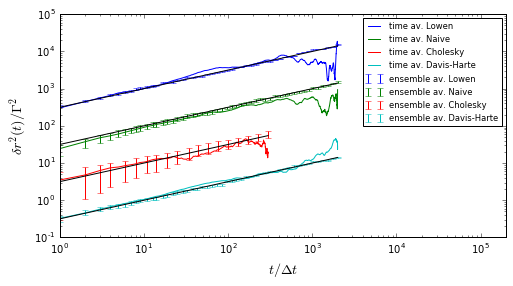

In [79]:

plt.figure(figsize=(8,4))

e=analyse_tool.Analyse(D=200,particles=1000,length=2000,alpha=0.5,dt=0.1,version='lowencpp')
msd,std3=e.msd_ensemble()
d=analyse_tool.Analyse(D=200,particles=1000,length=2000,alpha=0.5,dt=0.1,version='lowencpp')
msd1,std1=d.msd_time()

#msd_text='MSD=2 K_\\alpha t^\\alpha'
print len(msd)
print len(e.t[:])
plt.plot(e.t[:], 100*msd1[:]/gamma(e.D,e.dt),color="b",label="time av. Lowen")
plt.errorbar(d.t[y],100* msd[y]/gamma(e.D,e.dt) ,yerr=100*std3[y]/gamma(e.D,e.dt), color="b",linestyle="",markevery=y,label="ensemble av. Lowen")
plt.loglog(d.t,100*d.msdanalyt()/gamma(e.D,e.dt),color="k")


e=analyse_tool.Analyse(D=20,particles=1000,length=2000,alpha=0.5,dt=0.1,version='python')
msd,std=e.msd_ensemble()
d=analyse_tool.Analyse(D=20,particles=1000,length=2000,alpha=0.5,dt=0.1,version='python')
msd1,std1=d.msd_time()

msd_text='MSD=2 K_\\alpha t^\\alpha'

plt.plot(e.t[:],10*msd1[:]/gamma(e.D,e.dt),color="g",label="time av. Naive")
plt.errorbar(d.t[y], 10*msd[y]/gamma(e.D,e.dt),yerr=10*std[y]/gamma(e.D,e.dt), color="g",linestyle="",label="ensemble av. Naive")
plt.loglog(d.t,10*d.msdanalyt()/gamma(e.D,e.dt), color="k")

e=analyse_tool.Analyse(D=2,particles=1000,length=300,alpha=0.5,dt=0.1,version='nhoch3')
msd,std=e.msd_ensemble()
d=analyse_tool.Analyse(D=2,particles=1000,length=300,alpha=0.5,dt=0.1,version='nhoch3')
msd1,std1=d.msd_time()

#msd_text='MSD=2 K_\\alpha t^\\alpha'

plt.plot(e.t[:], 1*msd1[:]/gamma(e.D,e.dt), color="r",label="time av. Cholesky")
plt.errorbar(d.t[y1], 1*msd[y1]/gamma(e.D,e.dt) ,yerr=1*std[y1]/gamma(e.D,e.dt), color="r",linestyle="",label="ensemble av. Cholesky")
plt.loglog(d.t,1*d.msdanalyt()/gamma(e.D,e.dt),color="k")


e=analyse_tool.Analyse(D=100,particles=1000,length=2000,alpha=0.5,dt=0.1,version='hartecppverion2')
msd,std=e.msd_ensemble()
d=analyse_tool.Analyse(D=100,particles=1000,length=2000,alpha=0.5,dt=0.1,version='hartecppverion2')
msd1,std1=d.msd_time()

#msd_text='MSD=2 K_\\alpha t^\\alpha'k: 

plt.plot(e.t[:],0.1*msd1[:]/gamma(e.D,e.dt), color="c",label="time av. Davis-Harte")
plt.errorbar(d.t[y], 0.1*msd[y]/gamma(e.D,e.dt) ,color="c",linestyle="",yerr=0.1*std3[y]/gamma(e.D,e.dt), label="ensemble av. Davis-Harte")
plt.loglog(d.t,0.1*d.msdanalyt()/gamma(e.D,e.dt),color="k")


plt.xlim((0,200000))

#X=main.plot_ensemble_mean_of_time_msd()
plt.xlabel('$t/ \Delta t$', fontsize=14)
plt.ylabel('$\delta r^{2}(t)/ \Gamma^2$', fontsize=14)
lgd=plt.legend(  ncol=1,fontsize='small')

plt.savefig('Abschlussarbeit/data/timevsensambenew.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)   # save the figure to file 

plt.show()

# Smoluchwoski and erban chapmann disribution functions:

In [11]:
def radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance):
    c_inf=1.0
    a_2=c_inf*(np.sqrt(Diffusion/micro_reactionrate_forward)*np.tanh(reactiondistance*np.sqrt(micro_reactionrate_forward/Diffusion))-reactiondistance)
    return c_inf+a_2/bincenters
def index_cut(bincenters):
    for i in range(len(bincenters)):
        if bincenters[i] >= 1.:
            return i
def radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance):
    c_inf=1.0
    a_3=c_inf*np.sqrt(Diffusion/micro_reactionrate_forward)*(2*np.cosh(reactiondistance*np.sqrt(micro_reactionrate_forward/Diffusion)))**(-1)
    return ((2*a_3)/bincenters)*np.sinh(bincenters*np.sqrt(micro_reactionrate_forward/Diffusion))           

/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply
/home/mi/janekg89/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in sinh


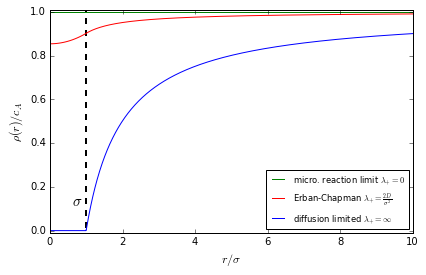

In [16]:
Diffusion=1.0
bincenters=np.linspace(0,10,1001)
reactiondistance=1.0

plt.figure(figsize=(6.5,4))
plt.plot([1.0, 1.0], [-0.1,1.1], 'k--', lw=2)
plt.ylim([-0.01,1.01])




plt.text(0.9, 0.1, '$\\sigma$',
        verticalalignment='bottom', horizontalalignment='right', fontsize=15)


micro_reactionrate_forward=0.0001

plt.plot(bincenters[index_cut(bincenters):],radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance)[index_cut(bincenters):],c="g", label="micro. reaction limit $\\lambda_{+} = 0$")
plt.plot(bincenters[:index_cut(bincenters)+1],radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance)[:index_cut(bincenters)+1],c="g")





micro_reactionrate_forward=1./3.


plt.plot(bincenters[index_cut(bincenters):],radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance)[index_cut(bincenters):],c="r", label="Erban-Chapman $\\lambda_{+}=\\frac{2D}{\\sigma^2}$")
plt.plot(bincenters[:index_cut(bincenters)+1],radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance)[:index_cut(bincenters)+1],c="r")
plt.xlabel('$r / \\sigma$ ', fontsize=12)
plt.ylabel('$\\rho(r)/c_A$', fontsize=12)





micro_reactionrate_forward=100000

plt.plot(bincenters[index_cut(bincenters):],radial_erban(Diffusion,bincenters,micro_reactionrate_forward,reactiondistance)[index_cut(bincenters):],c="b", label="diffusion limited $\\lambda_{+}= \\infty$")
plt.plot(bincenters[:index_cut(bincenters)+1],radial_erban_inside(bincenters,Diffusion,micro_reactionrate_forward,reactiondistance)[:index_cut(bincenters)+1],c="b")






plt.legend(loc=4,fontsize="small")
plt.savefig('Abschlussarbeit/data/smoluchowskierban.png',dpi=300)  
#else:
#    plt.plot(bincenters[index_cut():],radial_erban(bincenters,radial_s.mean(axis=0)*self.boxsize**3/len(self.radial_time_range))[index_cut():],linestyle="--")
#    plt.plot(bincenters[:index_cut()+1],radial_erban_inside(bincenters,radial_s.mean(axis=0)*self.boxsize**3/len(self.radial_time_range))[:index_cut()+1],linestyle="--")
plt.show()

[]